# Lung and Colon cancer Image Classification


Lung and colon cancers are two of the most common malignancies, which in some cases, may develop synchronously.
* Colon cancer is a type of cancer that begins in the large intestine (colon). The colon is the final part of the digestive tract. Colon cancer is sometimes called colorectal cancer, which is a term that combines colon cancer and rectal cancer, which begins in the rectum.
* Lung cancer, also known as lung carcinoma, since about 98–99% of all lung cancers are carcinomas, is a malignant lung tumor characterized by uncontrolled cell growth in tissues of the lung.

#### About Dataset
This dataset contains 25,000 histopathological images with 5 classes. 
 
All images are 768 x 768 pixels in size and are in jpeg file format. The images were generated from an original sample of HIPAA compliant and validated sources, consisting of 
1. 750 total images of lung tissue (250 benign lung tissue, 250 lung adenocarcinomas, and 250 lung squamous cell carcinomas) and 
2. 500 total images of colon tissue (250 benign colon tissue and 250 colon adenocarcinomas) and augmented to 25,000 using the Augmentor package.

#### Objective :
Our objective is to build a model to classify or differentiate type of Cancer(Lung or Colon) among 5 classes based on the dataset of images using Convolutional Neural Networks.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
## Preprocessing 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
## Models
from tensorflow.keras.models import Sequential
## Layers
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout 

from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.utils import plot_model
from matplotlib.image import imread
import matplotlib.image as mpimg
## Model evaluators
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score,classification_report,precision_score,recall_score,roc_auc_score

## -----------------------------Part 1 - Data Preprocessing-----------------------------

### 1. Splitting the dataset into Train, Test, Validation sets

In [2]:
#Using split-folders package to split the dataset into Train, Test and Validation sets in the ratio 8:1:1
#seed value for shuffling the items
#split files into equally-sized groups based on their prefix
'''import splitfolders
splitfolders.ratio("lung_colon_image_set", output="lung_colon_image_set_split",seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False) 
'''
#After splitting the dataset each Train, Test and Validation sets consists of all the 5 classes of image sets..
#->1.colon_aca
#->2.colon_n
#->3.lung_aca 
#->4.lung_n
#->5.lung_scc

'import splitfolders\nsplitfolders.ratio("lung_colon_image_set", output="lung_colon_image_set_split",seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False) \n'

### 2. Loading the dataset

In [3]:
directory = './lung_colon_image_set_split'

#folders in our dataset directory
print(os.listdir(directory))

directory_train = directory+'\\train\\'
directory_test = directory+'\\test\\'
directory_val = directory+'\\val\\'

#folders in Train,Test,Valid folder
print('Train set:',os.listdir(directory_train))
print('Test set:',os.listdir(directory_test))
print('Validation set:',os.listdir(directory_val))

['test', 'train', 'val']
Train set: ['colon_aca', 'colon_n', 'lung_aca', 'lung_n', 'lung_scc']
Test set: ['colon_aca', 'colon_n', 'lung_aca', 'lung_n', 'lung_scc']
Validation set: ['colon_aca', 'colon_n', 'lung_aca', 'lung_n', 'lung_scc']


### 3. Preprocessing the Training set

In [4]:
#Using ImageDataGenerator to load and augment images in batches.
train_datagen = ImageDataGenerator(
                               rescale=1./255,    #Rescaling helps the images are all sharing the same model,weights & learning rate
                               shear_range=0.2,   #Shear_range - the image will be distorted along an axis,
                               zoom_range=0.2,    #For random zoom
                               horizontal_flip=True   #Randomly flip inputs horizontally.
                              )

train_set =train_datagen.flow_from_directory(
                                     directory_train,
                                     target_size=(150,150),    #dimensions to which all images found will be resized.
                                     color_mode='rgb',
                                     class_mode='categorical',  #Determines the type of label arrays that are returned(one-hot encoded labels)
                                     batch_size=32    #Defines the no. of samples that will be propagated through the network.
                                    )

Found 20000 images belonging to 5 classes.


### 4. Preprocessing the Test set and Validation set

In [5]:
# Creating ImageDataGenerator for Test and Validation Set
test_datagen = ImageDataGenerator(rescale=1./255)

test_set =test_datagen.flow_from_directory(
                                         directory_test,
                                         target_size=(150,150),
                                         color_mode='rgb',
                                         class_mode='categorical',
                                         batch_size=32,
                                         shuffle=False  
                                        )


valid_set =test_datagen.flow_from_directory(
                                         directory_val,
                                         target_size=(150,150),
                                         color_mode='rgb',
                                         class_mode='categorical',
                                         batch_size=32,
                                        )

Found 2500 images belonging to 5 classes.
Found 2500 images belonging to 5 classes.


### 5. Viewing Sample images in the Train set.

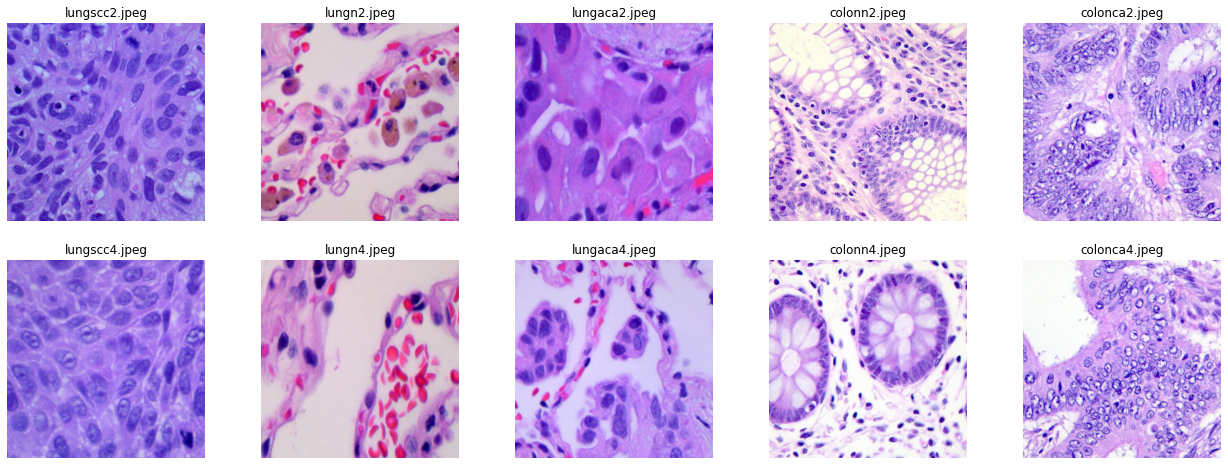

In [6]:
train_directory='./lung_colon_image_set_split/Train'
sample_images = ['./lung_colon_image_set_split/Train/lung_scc/lungscc2.jpeg', './lung_colon_image_set_split/Train/lung_n/lungn2.jpeg', 
           './lung_colon_image_set_split/Train/lung_aca/lungaca2.jpeg', './lung_colon_image_set_split/Train/colon_n/colonn2.jpeg', 
           './lung_colon_image_set_split/Train/colon_aca/colonca2.jpeg',
          './lung_colon_image_set_split/Train/lung_scc/lungscc4.jpeg', './lung_colon_image_set_split/Train/lung_n/lungn4.jpeg', 
           './lung_colon_image_set_split/Train/lung_aca/lungaca4.jpeg', './lung_colon_image_set_split/Train/colon_n/colonn4.jpeg', 
           './lung_colon_image_set_split/Train/colon_aca/colonca4.jpeg']
plt.figure(figsize=(22, 8)) 

c = 0
for i in sample_images:
    plt.subplot(2, 5, c + 1)
    c += 1
    t = i.split('/')
    plt.title(t[4])
    plt.imshow(load_img(i))
    plt.axis('off')
plt.show()

## -----------------------------Part 2 - Building the CNN-----------------------------

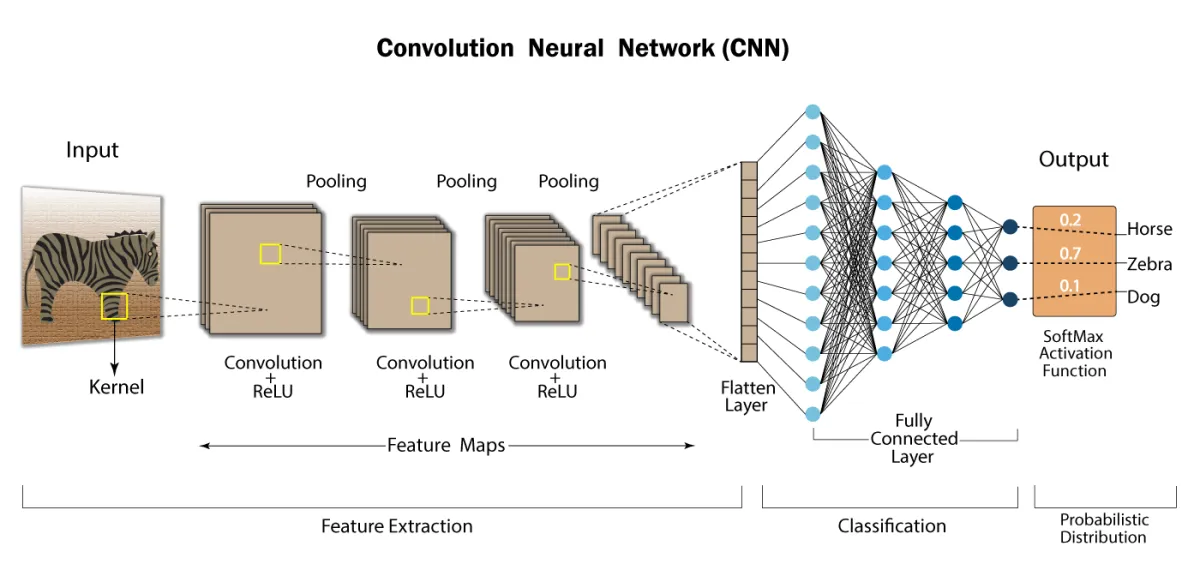

### 1. Initialising the CNN

In [7]:
#Sequential is the easiest way to build a model in Keras. It allows you to build a model layer by layer
cnn = Sequential()

### 2. Adding a First convolutional layer

#### Step 1 - Convolution

In [8]:
#2D Convolution Layer creates a convolution kernel that is wind with layers input which helps produce a tensor of outputs.

cnn.add(Conv2D(filters=32,    #determines the number of output filters in the convolution.32---
               kernel_size=(3,3), #determines the dimensions of the kernel
               activation='relu', #Using Rectifier activation function.
               input_shape=(150,150,3))) #width,height,channels

#### Step 2 - Pooling

In [9]:
#MaxPool2D - Downsamples the input along its spatial dimensions (height and width) 
cnn.add(MaxPool2D(pool_size=(2,2)))  # 2x2 pooling window

### 3. Adding a second convolutional layer

In [10]:
cnn.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))

### 4. Adding Third& Fourth convolutional layer

In [11]:
cnn.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))

cnn.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))

### 5. Flattening

In [12]:
#Flattens the multi-dimensional input tensors into a single dimension
cnn.add(Flatten())

### 6. Adding a hidden Dense layer

In [13]:
#Dense layer is a layer which is deeply connected with its preceding layer.
cnn.add(Dense(units=512,activation='relu'))  #units- dimensionality of the output space.

#Dropout will try to remove the noise data and thus prevent the model from over-fitting.
cnn.add(Dropout(rate=0.4))  

### 7. Adding Softmax function

In [14]:
#It is mainly used to normalize neural networks output to fit between 0 and 1
cnn.add(Dense(5,activation='softmax'))    

## -----------------------------Part 3 - Training the CNN-----------------------------

### 1. Compiling the CNN

In [15]:
optmz = tf.keras.optimizers.Adam(learning_rate=3e-4)
cnn.compile(optimizer=optmz,loss="categorical_crossentropy",metrics=['accuracy'])

In [16]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        3

### 2. Training the CNN on the Training set and evaluating it on the Test set

In [17]:
#EarlyStopping- Stop training when a monitored metric has stopped improving.
early = EarlyStopping(monitor='val_loss',patience=4,mode='min')

#Fit The model
model= cnn.fit(train_set,epochs=20,validation_data=valid_set,callbacks=[early])

#cnn.fit(train_set,epochs=25,validation_data=valid_set)

Epoch 1/20
625/625 [==============================] - 526s 841ms/step - loss: 0.5662 - accuracy: 0.7496 - val_loss: 0.3660 - val_accuracy: 0.8476
Epoch 2/20
625/625 [==============================] - 526s 842ms/step - loss: 0.3204 - accuracy: 0.8681 - val_loss: 0.2874 - val_accuracy: 0.8884
Epoch 3/20
625/625 [==============================] - 530s 847ms/step - loss: 0.2368 - accuracy: 0.9089 - val_loss: 0.2462 - val_accuracy: 0.9056
Epoch 4/20
625/625 [==============================] - 521s 833ms/step - loss: 0.1949 - accuracy: 0.9252 - val_loss: 0.1791 - val_accuracy: 0.9268
Epoch 5/20
625/625 [==============================] - 522s 835ms/step - loss: 0.1623 - accuracy: 0.9366 - val_loss: 0.1970 - val_accuracy: 0.9264
Epoch 6/20
625/625 [==============================] - 488s 780ms/step - loss: 0.1376 - accuracy: 0.9478 - val_loss: 0.1030 - val_accuracy: 0.9612
Epoch 7/20
625/625 [==============================] - 495s 792ms/step - loss: 0.1238 - accuracy: 0.9517 - val_loss: 0.0952 -

#### Evaluating Accuracy, val_accuray and Loss, val_loss curves

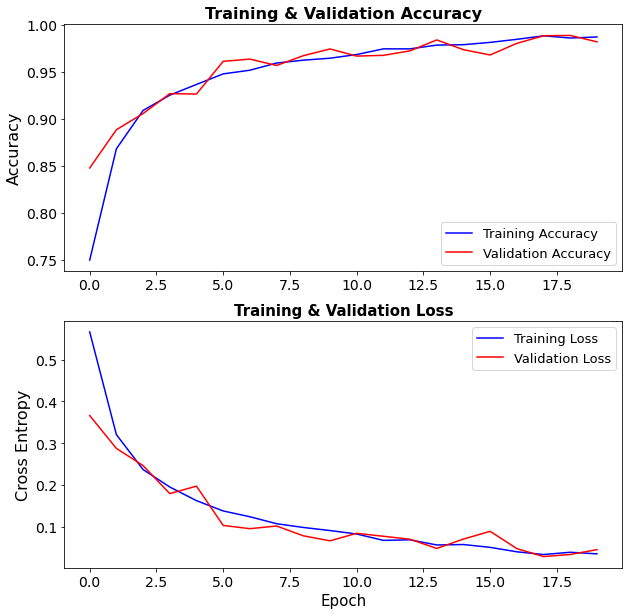

In [18]:
acc = model.history['accuracy']
val_acc = model.history['val_accuracy']
loss = model.history['loss']
val_loss = model.history['val_loss']

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)

plt.plot(acc, label='Training Accuracy', color='blue')
plt.plot(val_acc, label='Validation Accuracy', color='red')


plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc=4, fontsize=13)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Training & Validation Accuracy', fontsize=16, weight='bold')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc=1, fontsize=13)
plt.ylabel('Cross Entropy', fontsize=16)
plt.title('Training & Validation Loss', fontsize=15, weight='bold')
plt.xlabel('Epoch', fontsize=15)
plt.show()

### 3. Evaluating the model Performance

#### Classification Report

In [29]:
#testing the model output using test set.
result = cnn.predict(test_set) 

#Predicted values using test set.
predicted_values = np.argmax(result, axis=1)

#Actual test_set values.
Actual_values = test_set.classes

class_labels = list(test_set.class_indices.keys())   

#Viewing the classification report
report = classification_report(Actual_values, predicted_values, target_names=class_labels)

#### Accuracy, F1-score, Precision, Recall, Roc score

In [30]:
acc = accuracy_score(Actual_values, predicted_values)
f1=f1_score(Actual_values, predicted_values,average='macro')
precision=precision_score(Actual_values, predicted_values,average='macro')
recall=recall_score(Actual_values, predicted_values,average='macro')
roc=roc_auc_score(Actual_values, cnn.predict(test_set), average='weighted', multi_class='ovo')

print("Accuracy --> ",acc)
print("F1-score --> ",f1)
print("Precision score --> ",precision)
print("Recall score --> ",recall)
print("Roc score --> ",roc)

Accuracy -->  0.9856
F1-score -->  0.985600945450574
Precision score -->  0.9859942661280021
Recall score -->  0.9856
Roc score -->  0.9999522


#### Confusion Matrix

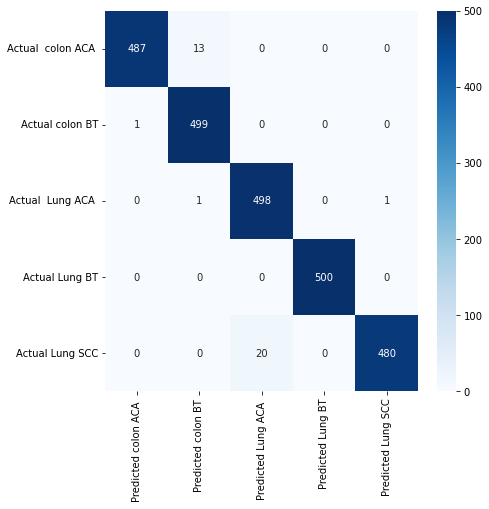

In [31]:
#Building the Confusion matrix based on predicted and actual test set values.
plt.subplots(figsize=(7,7))

matrix = confusion_matrix(Actual_values,predicted_values)
#print(matrix)

cm_df =pd.DataFrame(matrix,columns=['Predicted colon ACA ','Predicted colon BT','Predicted Lung ACA ','Predicted Lung BT','Predicted Lung SCC'],
                    index=['Actual  colon ACA ','Actual colon BT','Actual  Lung ACA ','Actual Lung BT','Actual Lung SCC'])

sns.heatmap(cm_df,annot=True,cmap="Blues", fmt='.0f');

#### Making a single prediction

In [32]:
single_image = "./lung_colon_image_set_split/Test/lung_n/lungn346.jpeg"

img = image.load_img(single_image, target_size = (150, 150))
arr = image.img_to_array(img)
x = np.expand_dims(arr, axis=0)
test_image = cnn.predict(x)
result = test_image.argmax(axis=-1)
print(train_set.class_indices)
if result ==[0]:
    print('colon Adenocarcinoma ')
elif result ==[1]:
    print('colon benign tissue ')
elif result ==[2]:
    print('Lung Adenocarcinoma')
elif result ==[3]:
    print('Lung benign tissue')
elif result ==[4]:
    print('Lung squamous cell carcinoma ')

{'colon_aca': 0, 'colon_n': 1, 'lung_aca': 2, 'lung_n': 3, 'lung_scc': 4}
Lung benign tissue


#### Conclusion

Using Convolutional Neural Networks, we can able to classify and predict the type of cancer with 5 classes. And achieved an Accuracy of around 98.5%